# Estimación de la Constante de Hubble usando Datos Simulados

## Descripción del modelo
Este notebook realiza un análisis basado en la **Ley de Hubble**, la cual establece una relación lineal entre la **distancia** a una galaxia y su **velocidad de recesión**. Utilizamos un conjunto de datos simulado con las columnas de **magnitud aparente** y **redshift** para estimar la **constante de Hubble** mediante un modelo de **regresión lineal**. El dataset simulado contiene datos de supernovas tipo Ia, que actúan como indicadores de distancia.

## Estructura del Notebook
1. **Cargar el dataset:** Se importa un archivo CSV con datos de supernovas que contienen información sobre la magnitud aparente y el redshift.
2. **Calcular distancias y velocidades:** A partir de la magnitud aparente y utilizando una magnitud absoluta conocida para las supernovas tipo Ia, se calculan las distancias en megaparsecs (Mpc). Luego, utilizando el redshift, se calculan las velocidades de recesión en km/s.
3. **Ajuste del modelo de regresión lineal:** Se utiliza `LinearRegression` de `sklearn` para ajustar un modelo que relacione las distancias y las velocidades. El coeficiente de la pendiente de la regresión es la **constante de Hubble** estimada.
4. **Visualización:** Se grafican los datos simulados y la línea de regresión ajustada, mostrando la relación entre distancia y velocidad.

## Aprendizaje Esperado
Al finalizar este notebook, los usuarios habrán aprendido a:
- Aplicar la **Ley de Hubble** para calcular distancias y velocidades a partir de datos astronómicos.
- Realizar una regresión lineal para estimar la **constante de Hubble**.
- Interpretar los resultados de la regresión y comparar la constante de Hubble estimada con el valor aceptado en la literatura (~70 km/s/Mpc).
- Visualizar la relación distancia-velocidad mediante un gráfico de dispersión y una línea de ajuste.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar el dataset simulado (suponiendo que está en un archivo CSV)
# El archivo debe contener las columnas 'magnitud_aparente' y 'redshift'

data = pd.read_csv("data/dataset_hubble.csv")

Trabjaar los datos para dejarlos en la forma correcta

In [2]:
## codigo guardado como aDistanciaVelocidad en utils

# Definir la magnitud absoluta de las supernovas tipo Ia
M_absoluta = -19.3

# Calcular las distancias (en parsecs)
data['distancia'] = 10 ** ((data['apparent_magnitude'] - M_absoluta + 5) / 5)

# se pasa a Mega parsec
data['distancia'] = data['distancia'] / 10**6

# Calcular las velocidades de recesión (en km/s)
velocidad_luz = 300000  # km/s
data['velocidad'] = data['redshift'] * velocidad_luz

# Preparar los datos para la regresión lineal
X = data['distancia'].values.reshape(-1, 1)  # Distancia
y = data['velocidad'].values  # Velocidad

In [3]:
X[:5]

array([[160.60860106],
       [182.17883356],
       [282.16853514],
       [203.35689855],
       [263.92770482]])

In [4]:
y[:5]

array([12157.85559122, 14211.03034782, 20932.81066297, 15864.0020335 ,
       19698.59516919])

## Modelo de Regresion

In [5]:
# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()

Le pasamos los datos al modelo

In [6]:
modelo.fit(X, y)

LinearRegression()

Extraemos la informacion del modelo, la constante de proporcionalidad sera la constante de Hubble

In [7]:
# Coeficiente de la pendiente = constante de Hubble (H0)
H0 = modelo.coef_[0]
print(f"Constante de Hubble estimada: {H0} km/s/Mpc")

Constante de Hubble estimada: 74.53807339968095 km/s/Mpc


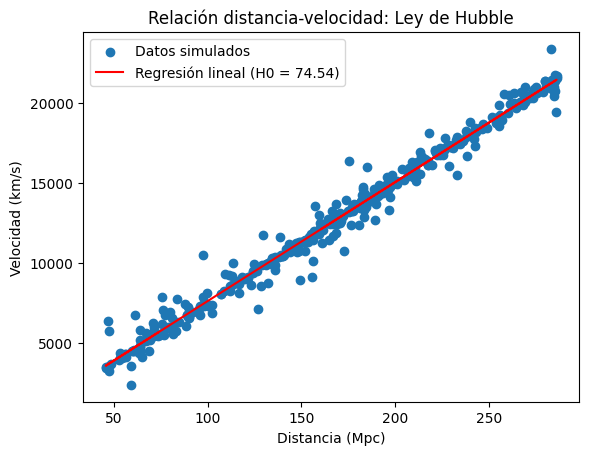

In [9]:


# Graficar los resultados
plt.scatter(data['distancia'], data['velocidad'], label='Datos simulados')
plt.plot(data['distancia'], modelo.predict(X), color='red', label=f'Regresión lineal (H0 = {H0:.2f})')
plt.xlabel('Distancia (Mpc)')
plt.ylabel('Velocidad (km/s)')
plt.legend()
plt.title('Relación distancia-velocidad: Ley de Hubble')
plt.show()


La constante segun la literatura es alrededor de 70 km/s/Mpc